In [77]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
from urllib import request as rq
import urllib
import re
import math
import os
import csv
import time
import json
import pickle
import sys
import requests
from scipy import stats
from math import log

from sklearn.cross_decomposition import PLSRegression
from sklearn import linear_model
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
cwd = os.getcwd()
print(cwd)

/var/www/Repositories/oscars/models


In [96]:
# use AA_bestpictures_Liam_Kimiko_clean.csv
datacsv = open("../AA_bestpictures_Liam_Kimiko_clean.csv")
reader = list(csv.reader(datacsv, delimiter=',', quotechar='"'))

# print(list(reader))
fields = [x.strip() for x in reader.pop(0)]

frame = pd.DataFrame(reader, columns=fields)
print(fields)
X = [[float(x[5].strip()),int(x[6].strip()),int(x[7].strip()),float(x[8].strip()),int(x[9].strip()),float(x[10].strip())] for x in reader]
Y = []

X = np.array(X).T
X[1] = np.log(X[1])
X[2] = np.log(np.sqrt(100-X[2]+1)+.01)

# X[3] = np.log(np.sqrt(10-X[3]+.01)+.01)
# X[5] = np.log(np.sqrt(10-X[5]+.01)+.01)

X[4] = np.log(np.sqrt(100-X[4]+1)+.01)

# X = np.array([(row - row.min()) / (row.max()-row.min()) for row in X])
# X[1] = (X[1] - X[1].min()) / (X[1].max()-X[1].min())
# print(X[0])
X = X.T
X = list(X)
for x in reader:
    ret = 0
    if x[2].strip() == "True":
        ret = 1
    Y.append(ret)
# for row in reader:
#     print (row)

XTest = X[-100:]
YTest = Y[-100:]
XTrain = X[:-100]
YTrain = Y[:-100]
logreg = linear_model.LogisticRegression()
logreg.fit(XTrain, YTrain)

# pls = PLSRegression(n_components=3, max_iter=30000)
# pls.fit(inputs,outputs)
# pred = pls.predict(inputs)
# pls.score(inputs,outputs)
# # pls.get_params()

['year', 'Academy Award', 'Winner', 'Movie Name', 'Producer', 'IMDB Rating', 'IMDB Votes', 'Tomatometer', 'Average Critic Score', 'Percent Audience Liked', 'Average Audience Score']


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [97]:
# print(StatsOnly)
stats.describe(X)

DescribeResult(nobs=512, minmax=(array([ 3.1       ,  1.60943791,  0.00995033,  3.6       ,  0.55506304,
        5.4       ]), array([ 10.        ,  14.35974001,   2.25095837,   9.5       ,
         2.21649889,   9.        ])), mean=array([ 7.55722656,  9.51344901,  1.07810535,  7.70117187,  1.42044225,
        7.51835937]), variance=array([ 0.51204161,  7.71263224,  0.29045846,  0.84489099,  0.08613218,
        0.38197147]), skewness=array([-1.67949751, -0.852585  , -0.54791668, -0.83171907,  0.1084179 ,
       -0.53055206]), kurtosis=array([ 7.69090486,  0.5991322 , -0.22263343,  1.10075016, -0.0271461 ,
        0.25257676]))

In [98]:
score = logreg.score(XTest, YTest)
print("Our regression has an accuracy of %s%%" % (score*100))


preds =  logreg.predict(XTest)
corr = 0
for o,e in zip(preds,YTest):
    if o == e and o == 1:
        corr += 1
winners = [y for y in YTest if y == 1]
losers = [y for y in YTest if y == 0]
print (YTest)
print(preds)
f1 = f1_score(preds, YTest)
prec = precision_score(preds, YTest)
rec = recall_score(preds, YTest)
print(len(winners))
print(len(losers))
print("We predict winners with an accuracy of %s%%" % ((corr/len(winners))*100))
print('F-score: %s | Precision: %s | Recall: %s' % (f1, prec, rec))

Our regression has an accuracy of 85.0%
[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
15
85
We predict winners with an accuracy of 0.0%
F-score: 0.0 | Precision: 0.0 | Recall: 0.0


/home/liam/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/liam/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


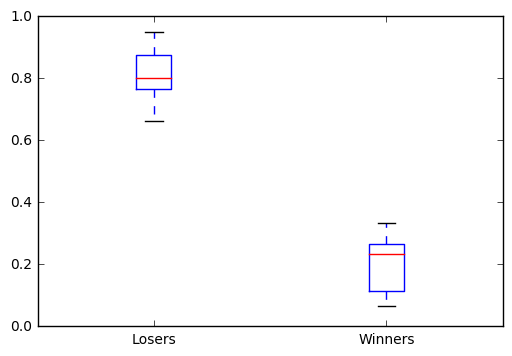

Clearly our regression is better at predicting losers
Ttest_indResult(statistic=30.723400548708245, pvalue=4.1904652753771655e-52)
Perhaps this is simply because losers occur more frequently and we dont have enough data to counter act this trend


In [73]:
# gets the prediction strength for each row in Test set
# sorts predictions by class and box plots them
strengths = logreg.predict_proba(XTest)
strengthsSorted = [[],[]]
for strenM, out in zip (strengths,YTest):
    strengthsSorted[out].append(strenM[out])
# print(strengthsSorted)
plt.boxplot(strengthsSorted, labels=["Losers", "Winners"])
plt.show()
ttestres = stats.ttest_ind(strengthsSorted[0], strengthsSorted[1])
print("Clearly our regression is better at predicting losers")
print(ttestres)
print("Perhaps this is simply because losers occur more frequently and we dont have enough data to counter act this trend")

In [74]:
# these are the weights for the models inputs
for l,v in zip(fields[5:], logreg.coef_[0]):
    print(l+ ": " + str(v))
print(logreg.intercept_)

IMDB Rating: -0.64896111698
IMDB Votes: 1.58799472967
Tomatometer: 0.754467118992
Average Critic Score: 0.457561623516
Percent Audience Liked: -1.7253881806
Average Audience Score: -0.777578186407
[-1.46669904]


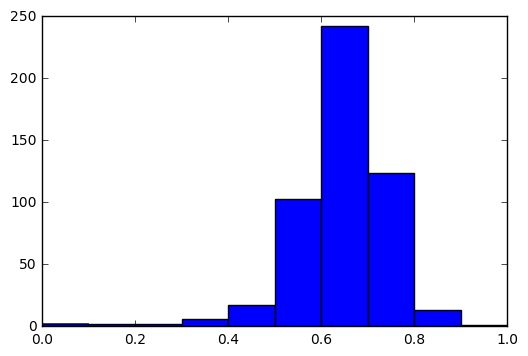

IMDB Rating
Observations: 512
Min: 0.0
Max: 1.0
Mean: 0.64597486413
Median: 0.652173913043
Standard Dev: 0.103604592108






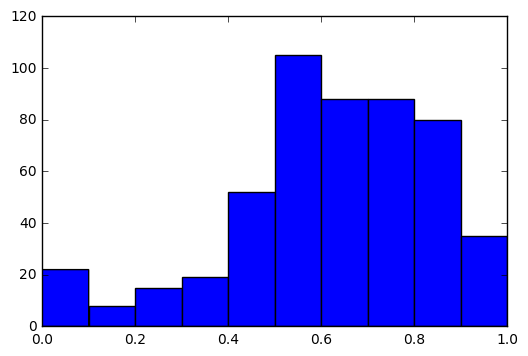

Log10 of IMDB Votes
Observations: 512
Min: 0.0
Max: 1.0
Mean: 0.619907750684
Median: 0.633651276292
Standard Dev: 0.217598705018






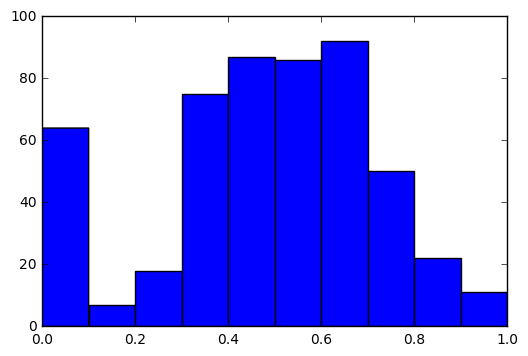

Tomatometer
Observations: 512
Min: 0.0
Max: 1.0
Mean: 0.476640423015
Median: 0.510707450631
Standard Dev: 0.240255905691






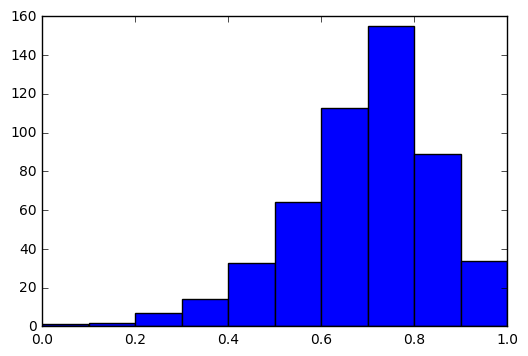

Average Critic Score
Observations: 512
Min: 0.0
Max: 1.0
Mean: 0.695113877119
Median: 0.71186440678
Standard Dev: 0.155640923064






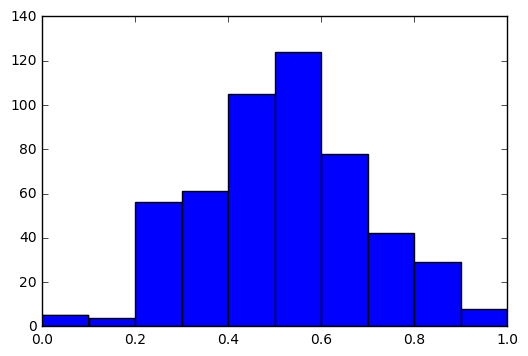

Percent Audience Liked
Observations: 512
Min: 0.0
Max: 1.0
Mean: 0.520862243756
Median: 0.520011680079
Standard Dev: 0.176471514217






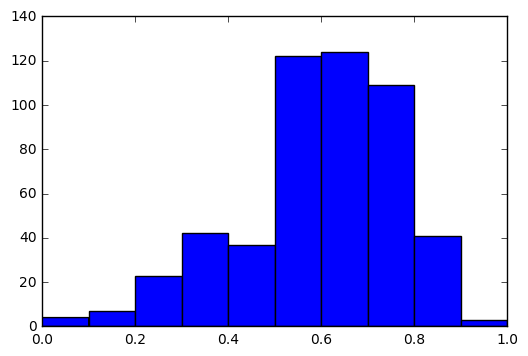

Average Audience Score
Observations: 512
Min: 0.0
Max: 1.0
Mean: 0.588433159722
Median: 0.611111111111
Standard Dev: 0.17150959943






In [75]:
# inputArrs = [[] for i in range(len(X[0]))]
# for i in range(len(X[0])):
#     inputArrs[i] = [x[i] for x in X]
# print(inputArrs)
inputArrs = list(np.array(X).T)
# for i,x in enumerate(inputArrs[1]):
#     if x > 0:
#         inputArrs[1][i] = log(x,10)
# inputArrs[1] = [log(x,10) for x in inputArrs[1]]

for i,arr in enumerate(inputArrs):
    plt.hist(arr, label=fields[i+5], range=(0, 1))
    plt.show()
    if i != 1:
        print(fields[i+5])
    else:
        print("Log10 of %s" % fields[i+5].strip())
    desc = stats.describe(arr)
    print("Observations: %s" % desc.nobs)
    print("Min: %s" % desc.minmax[0])
    print("Max: %s" % desc.minmax[1])
    print("Mean: %s" % desc.mean)
    print("Median: %s" % np.median(arr))
    print("Standard Dev: %s" % np.std(arr))
    print("\n")
    print("\n")